# <h1 style="color:red"> Inferential Analysis - Question and Answer with Python </h1>
<b>Justification or answer summary needed for every question</b> 

<h2 style="color:purple">Download the dataset </h2>
<h4 style="color:Blue"> Data Collection </h4>

In [77]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [78]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

<h3 style="color:green">👉 The Placement dataset has 215 rows × 15 columns.</h3>

<h2 style="color:purple">1. Replace the NaN values with correct value. And justify why you have
chosen the same.</h2>

In [79]:
# Check null value
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


👉 In the dataset, 67 students are not placed, so their salary values are missing. Since these students did not receive a salary, we can fill the missing values with zero.

Missing values can generally be handled using various methods such as:

1. Mean imputation

2. Median imputation

3. Mode imputation

4. KNN or predictive model imputation

5. Constant value imputation


In this case, we use a <b>constant value (zero)</b> because it accurately reflects that unplaced students have no salary.

In [84]:
# Fill missing salary values with zero
dataset['salary'] = dataset['salary'].fillna(0)
#recheck null values
dataset['salary'].isnull().sum()

np.int64(0)

<h3 style="color:green"> Replaced-67 null values to zero in the salary column </h3>

<h2 style="color:purple">2) How many of them are not placed?</h2>

In [86]:
# Count of each category
counts = dataset['status'].value_counts()
print("Count of placed vs not placed:\n", counts)

# Percentage of each category
percentages = dataset['status'].value_counts(normalize=True) * 100
print("\nPercentage % of placed vs not placed:\n", percentages.round(2))

Count of placed vs not placed:
 status
Placed        148
Not Placed     67
Name: count, dtype: int64

Percentage % of placed vs not placed:
 status
Placed        68.84
Not Placed    31.16
Name: proportion, dtype: float64


<h3 style="color:green"> 67 students (31.16%) were not placed </h3>

<h2 style="color:purple">3. Find the reason for non placement from the dataset?
</h2>

<h2 style="color:blue">Compare numeric features</h2>

In [88]:
numeric_cols = ['ssc_p','hsc_p','degree_p','mba_p','etest_p']
# Mean comparison
dataset.groupby('status')[numeric_cols].mean()

,ssc_p,hsc_p,degree_p,mba_p,etest_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,61.612836,69.587910
Placed,71.721486,69.926554,68.740541,62.579392,73.238041


<h2 style="color:green"><li>✅ Lower 10th/12th/degree/mba marks or etest scores may correlate with Not Placed.<li>10th and 12th mark are major factor for not placed </h2>

<h2 style="color:blue">Compare categorical features</h2>

In [89]:
categorical_cols = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    
    # Create crosstab with percentages
    ctab = pd.crosstab(dataset[col], dataset['status'], normalize='index') * 100
    
    # Add a column for difference between 'Placed' and 'Not Placed' percentages
    if 'Placed' in ctab.columns and 'Not Placed' in ctab.columns:
        ctab['Difference'] = ctab['Placed'] - ctab['Not Placed']
    elif 'Placed' in ctab.columns:
        ctab['Difference'] = ctab['Placed']
    elif 'Not Placed' in ctab.columns:
        ctab['Difference'] = -ctab['Not Placed']
    
    print(ctab.round(2))


Column: gender
status  Not Placed  Placed  Difference
gender                                
F            36.84   63.16       26.32
M            28.06   71.94       43.88

Column: ssc_b
status   Not Placed  Placed  Difference
ssc_b                                  
Central       32.76   67.24       34.48
Others        29.29   70.71       41.41

Column: hsc_b
status   Not Placed  Placed  Difference
hsc_b                                  
Central       32.14   67.86       35.71
Others        30.53   69.47       38.93

Column: hsc_s
status    Not Placed  Placed  Difference
hsc_s                                   
Arts           45.45   54.55        9.09
Commerce       30.09   69.91       39.82
Science        30.77   69.23       38.46

Column: degree_t
status     Not Placed  Placed  Difference
degree_t                                 
Comm&Mgmt       29.66   70.34       40.69
Others          54.55   45.45       -9.09
Sci&Tech        30.51   69.49       38.98

Column: workex
status  Not Pl

In [ ]:
<h2 style="color:blue">plot view</h2>

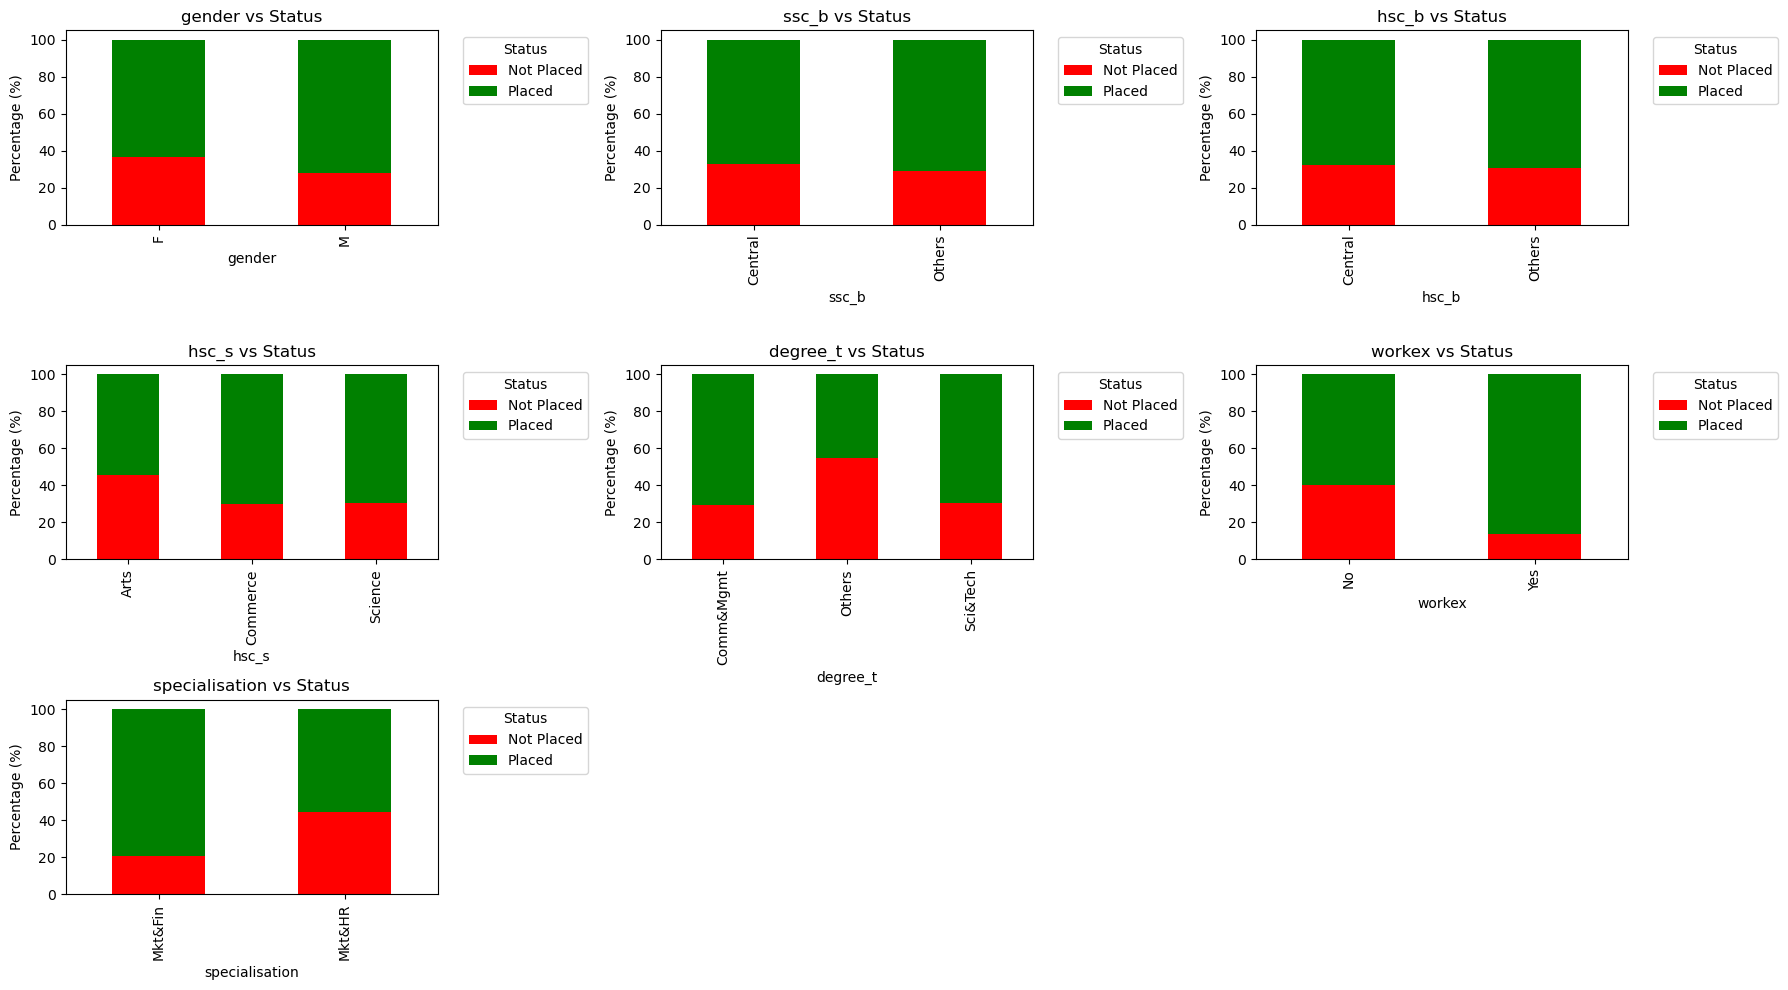

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to analyze
columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Create 3x3 grid (9 subplots, but we'll use only 7)
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
axs = axs.flatten()  # Flatten for easy iteration

# Define colors
colors = {'Placed': 'green', 'Not Placed': 'red'}

# Loop through all columns
for i, col in enumerate(columns):
    # Crosstab as percentages
    ctab = pd.crosstab(dataset[col], dataset['status'], normalize='index') * 100
    
    # Plot stacked bar chart
    ctab.plot(
        kind='bar',
        stacked=True,
        ax=axs[i],
        color=[colors.get(x, 'gray') for x in ctab.columns]
    )
    
    axs[i].set_title(f"{col} vs Status", fontsize=12)
    axs[i].set_ylabel("Percentage (%)")
    axs[i].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove any unused subplots
for j in range(len(columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


✅ This shows, for example:

1. If workexepriance = No, % of Not Placed may be higher.
2. If specialisation  = Mkt&HR, % of Not Placed may be Moderate.
3. If hsc_s = Arts group, % of Not Placed may be Lower.
3. If degree_t = other group, % of Not Placed may be Lower.

<h3 style="color:green"> Conclusion (from initial analysis):

No work experience is a major factor.

Lower exam scores (ssc_p, hsc_p, degree_p, etest_p, mba_p) contribute.

Certain specialisations might have lower placement rates. </h3>

In [25]:
dataset[dataset['status']=="Not Placed"]['status'].count()

np.int64(67)

<h3 style="color:green"> The Placement dataset shows that 67 students were not placed.</h3>

<h2 style="color:purple">3)Find the reason for non placement from the dataset?</h2>

In [34]:
# Compare placed vs not placed
placed = dataset[dataset['status'] == 'Placed']
not_placed = dataset[dataset['status'] == 'Not Placed']

# Average comparison num_cals
average_table=pd.DataFrame()
average_table["Placed"]=placed[['ssc_p','hsc_p','degree_p','mba_p','etest_p']].mean()
average_table["Not Placed"]=not_placed[['ssc_p','hsc_p','degree_p','mba_p','etest_p']].mean()
average_table

,Placed,Not Placed
ssc_p,71.721486,57.544030
hsc_p,69.926554,58.395522
degree_p,68.740541,61.134179
mba_p,62.579392,61.612836
etest_p,73.238041,69.587910


In [46]:
# Average comparison catcals_cals
cat_table=pd.DataFrame()
print(placed[placed['gender']=="M"]['gender'].count().mean())
print(not_placed[not_placed['gender']=="M"]['gender'].count().mean())

100.0
39.0


In [49]:
# Check work experience impact
print(dataset.groupby(['gender', 'status']).size())

gender  status    
F       Not Placed     28
        Placed         48
M       Not Placed     39
        Placed        100
dtype: int64


In [50]:
pd.crosstab(dataset['gender'], dataset['status'], normalize='index') * 100

status,Not Placed,Placed
gender,,
F,36.842105,63.157895
M,28.057554,71.942446


In [57]:
for cal in dataset[['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']]:
    print(pd.crosstab(dataset[cal ], dataset['status'], normalize='index') * 100,"\n")

status  Not Placed     Placed
gender                       
F        36.842105  63.157895
M        28.057554  71.942446 

status   Not Placed     Placed
ssc_b                         
Central   32.758621  67.241379
Others    29.292929  70.707071 

status   Not Placed     Placed
hsc_b                         
Central   32.142857  67.857143
Others    30.534351  69.465649 

status    Not Placed     Placed
hsc_s                          
Arts       45.454545  54.545455
Commerce   30.088496  69.911504
Science    30.769231  69.230769 

status     Not Placed     Placed
degree_t                        
Comm&Mgmt   29.655172  70.344828
Others      54.545455  45.454545
Sci&Tech    30.508475  69.491525 

status  Not Placed     Placed
workex                       
No       40.425532  59.574468
Yes      13.513514  86.486486 

status          Not Placed     Placed
specialisation                       
Mkt&Fin          20.833333  79.166667
Mkt&HR           44.210526  55.789474 



In [63]:
numeric_cols = ['ssc_p','hsc_p','degree_p','etest_p','mba_p']

# Mean comparison
dataset.groupby('status')[numeric_cols].mean()


,ssc_p,hsc_p,degree_p,etest_p,mba_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836
Placed,71.721486,69.926554,68.740541,73.238041,62.579392


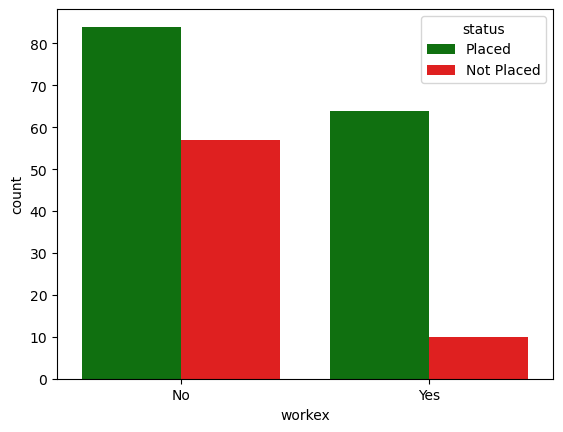

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=dataset, x='workex', hue='status', palette={'Placed':'green','Not Placed':'red'})
plt.show()


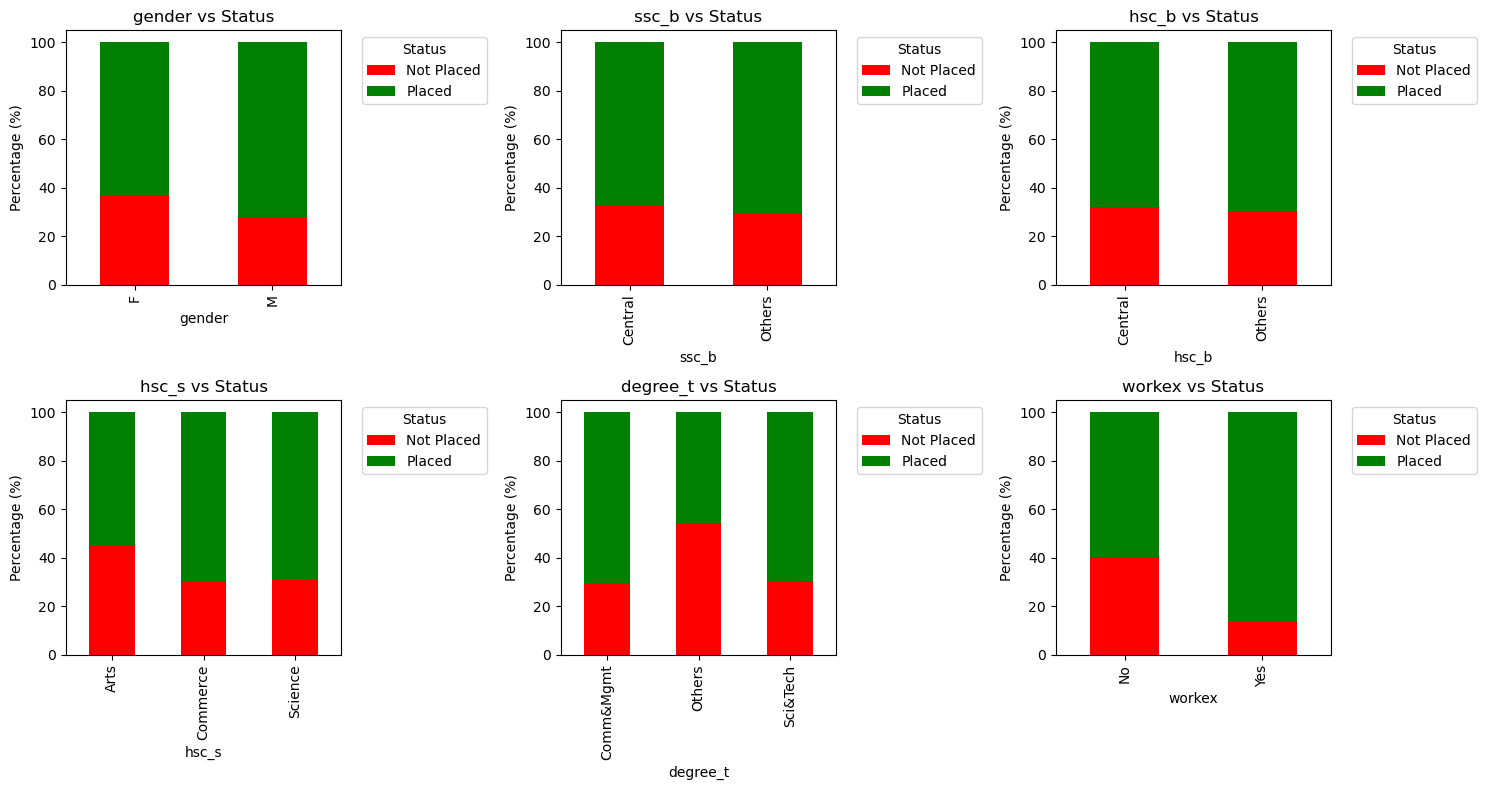

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to analyze
columns = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']

# Create 2x3 grid (6 subplots)
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()  # Flatten for easy iteration

# Define colors
colors = {'Placed': 'green', 'Not Placed': 'red'}

for i, col in enumerate(columns[:6]):
    # Crosstab as percentages
    ctab = pd.crosstab(dataset[col], dataset['status'], normalize='index') * 100
    
    # Plot stacked bar chart with custom colors
    ctab.plot(kind='bar', stacked=True, ax=axs[i], color=[colors.get(x, 'gray') for x in ctab.columns])
    axs[i].set_title(f"{col} vs Status")
    axs[i].set_ylabel("Percentage (%)")
    axs[i].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


1️⃣ Summary of Not Placed

In [61]:
categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(pd.crosstab(dataset[col], dataset['status'], normalize='index') * 100)



Column: gender
status  Not Placed     Placed
gender                       
F        36.842105  63.157895
M        28.057554  71.942446

Column: ssc_b
status   Not Placed     Placed
ssc_b                         
Central   32.758621  67.241379
Others    29.292929  70.707071

Column: hsc_b
status   Not Placed     Placed
hsc_b                         
Central   32.142857  67.857143
Others    30.534351  69.465649

Column: hsc_s
status    Not Placed     Placed
hsc_s                          
Arts       45.454545  54.545455
Commerce   30.088496  69.911504
Science    30.769231  69.230769

Column: degree_t
status     Not Placed     Placed
degree_t                        
Comm&Mgmt   29.655172  70.344828
Others      54.545455  45.454545
Sci&Tech    30.508475  69.491525

Column: workex
status  Not Placed     Placed
workex                       
No       40.425532  59.574468
Yes      13.513514  86.486486

Column: specialisation
status          Not Placed     Placed
specialisation                